In [1]:
library(ggplot2)
library(dplyr)
library(cluster)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
set.seed(1)


In [3]:
mall_data <- read.csv("/home/asus/content/Notes/Semester 4/FDN Lab/Experiments/Experiment 6/Mall_Customers.csv")


In [4]:
head(mall_data)
summary(mall_data)


,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


   CustomerID        Gender               Age        Annual.Income..k..
 Min.   :  1.00   Length:200         Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Class :character   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50   Mode  :character   Median :36.00   Median : 61.50    
 Mean   :100.50                      Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                      3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                      Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

In [5]:
colnames(mall_data) <- c("CustomerID", "Gender", "Age", "AnnualIncome", "SpendingScore")


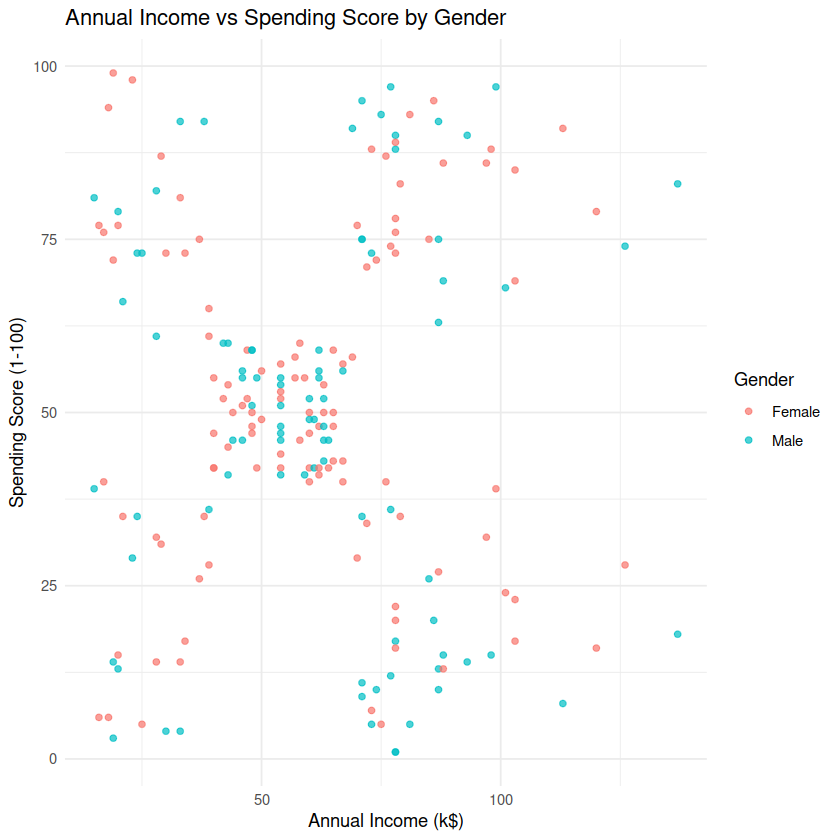

In [6]:
ggplot(mall_data, aes(x = AnnualIncome, y = SpendingScore)) +
  geom_point(aes(color = Gender), alpha = 0.7) +
  labs(title = "Annual Income vs Spending Score by Gender",
       x = "Annual Income (k$)",
       y = "Spending Score (1-100)") +
  theme_minimal()



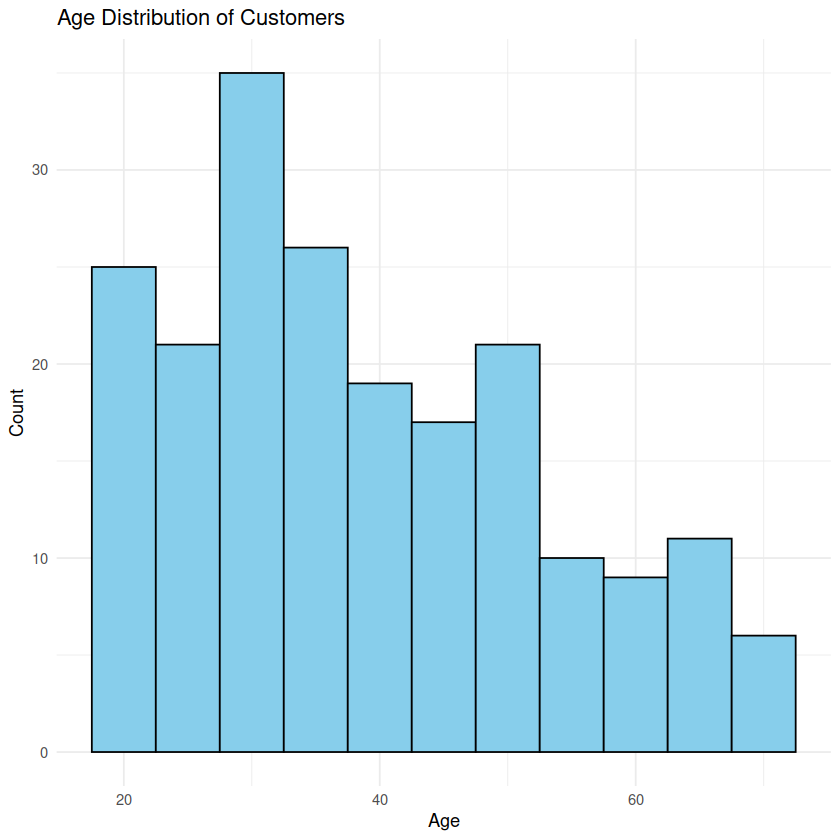

In [7]:
ggplot(mall_data, aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "Age Distribution of Customers",
       x = "Age",
       y = "Count") +
  theme_minimal()



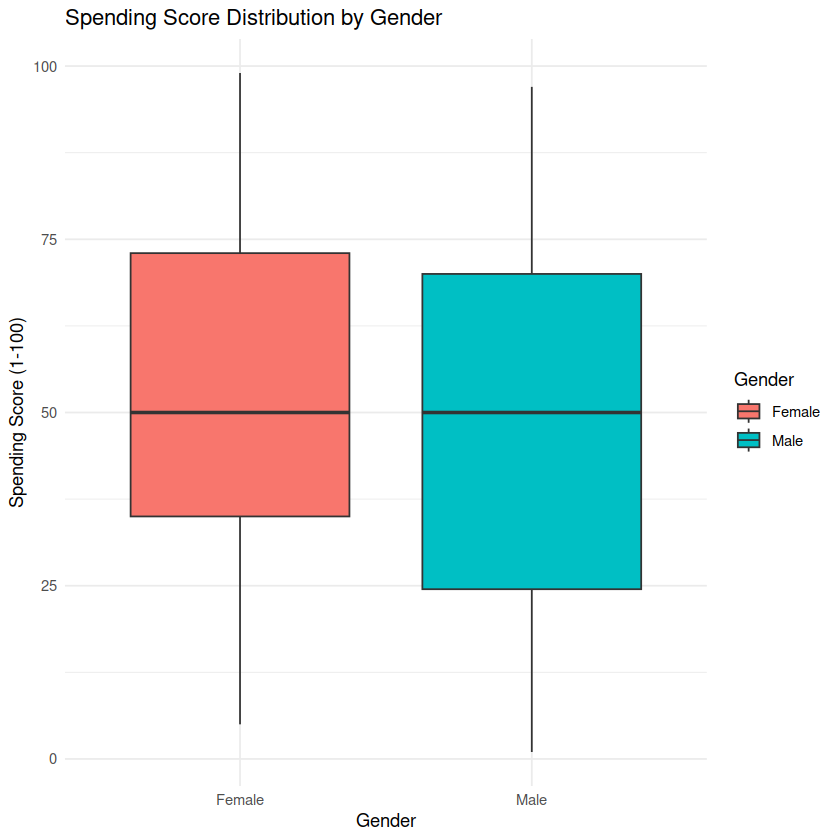

In [8]:
ggplot(mall_data, aes(x = Gender, y = SpendingScore, fill = Gender)) +
  geom_boxplot() +
  labs(title = "Spending Score Distribution by Gender",
       y = "Spending Score (1-100)") +
  theme_minimal()
# ===================================
# Part 2
# ===================================

In [9]:
data_for_clustering <- mall_data[, c("AnnualIncome", "SpendingScore")]


In [10]:

wss <- function(k) {
  kmeans(data_for_clustering, k, nstart = 10)$tot.withinss
}


In [11]:
k_values <- 1:10
wss_values <- sapply(k_values, wss)


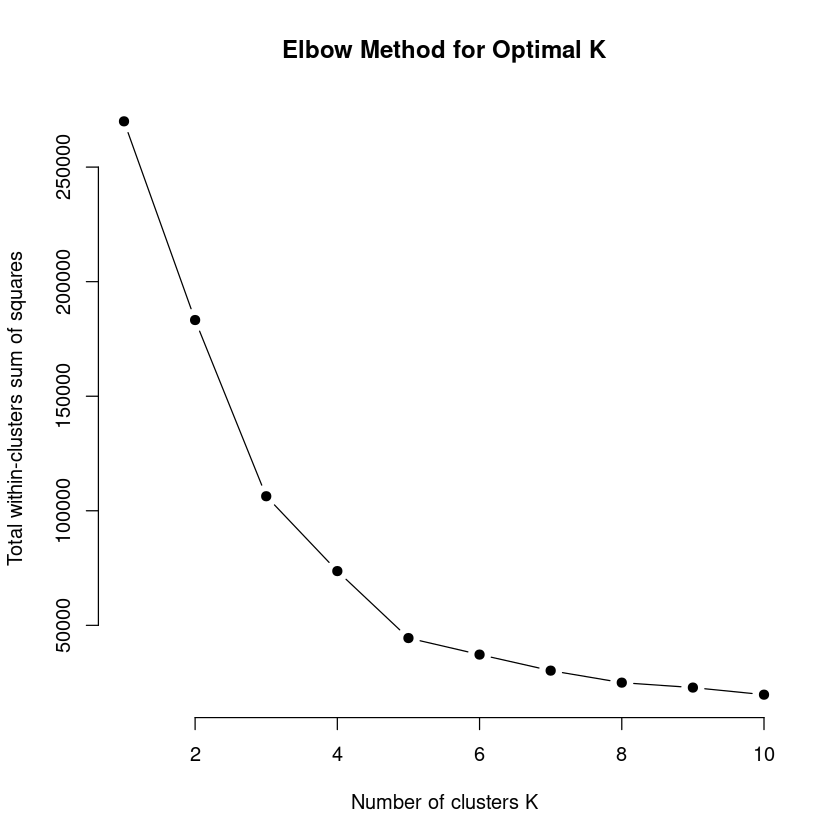

In [12]:
plot(k_values, wss_values,
     type = "b", pch = 19, frame = FALSE,
     xlab = "Number of clusters K",
     ylab = "Total within-clusters sum of squares",
     main = "Elbow Method for Optimal K")


In [13]:
avg_sil <- function(k) {
  km.res <- kmeans(data_for_clustering, centers = k, nstart = 25)
  ss <- silhouette(km.res$cluster, dist(data_for_clustering))
  mean(ss[, 3])
}


In [14]:

k_values <- 2:10
avg_sil_values <- sapply(k_values, avg_sil)


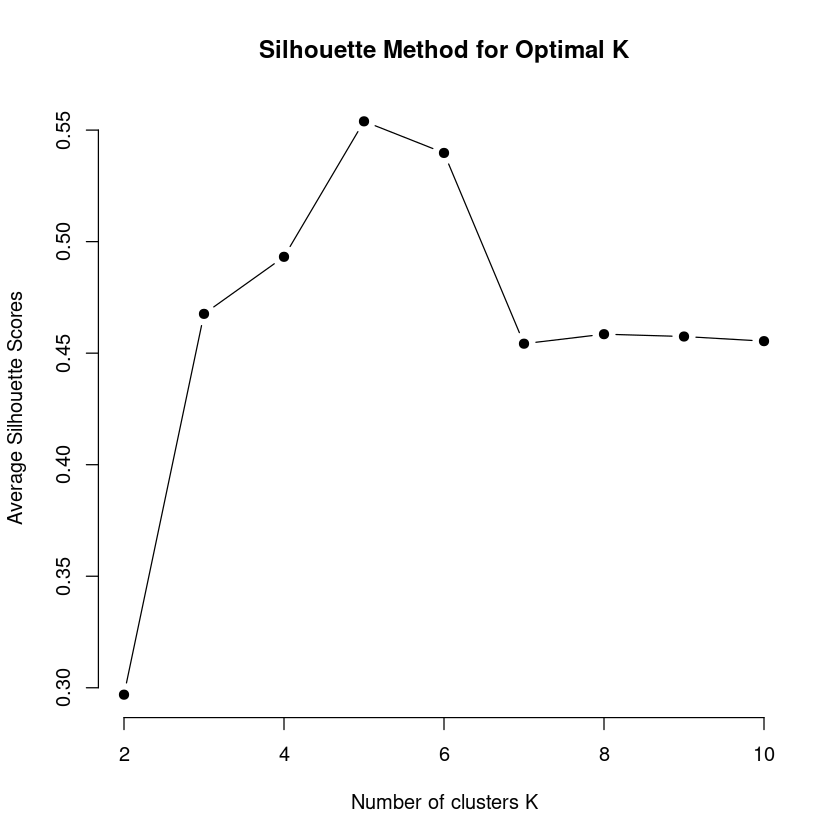

In [15]:
plot(k_values, avg_sil_values,
     type = "b", pch = 19, frame = FALSE,
     xlab = "Number of clusters K",
     ylab = "Average Silhouette Scores",
     main = "Silhouette Method for Optimal K")


In [16]:
final_k <- 5


In [17]:
kmeans_result <- kmeans(data_for_clustering, centers = final_k, nstart = 25)
mall_data$Cluster <- as.factor(kmeans_result$cluster)


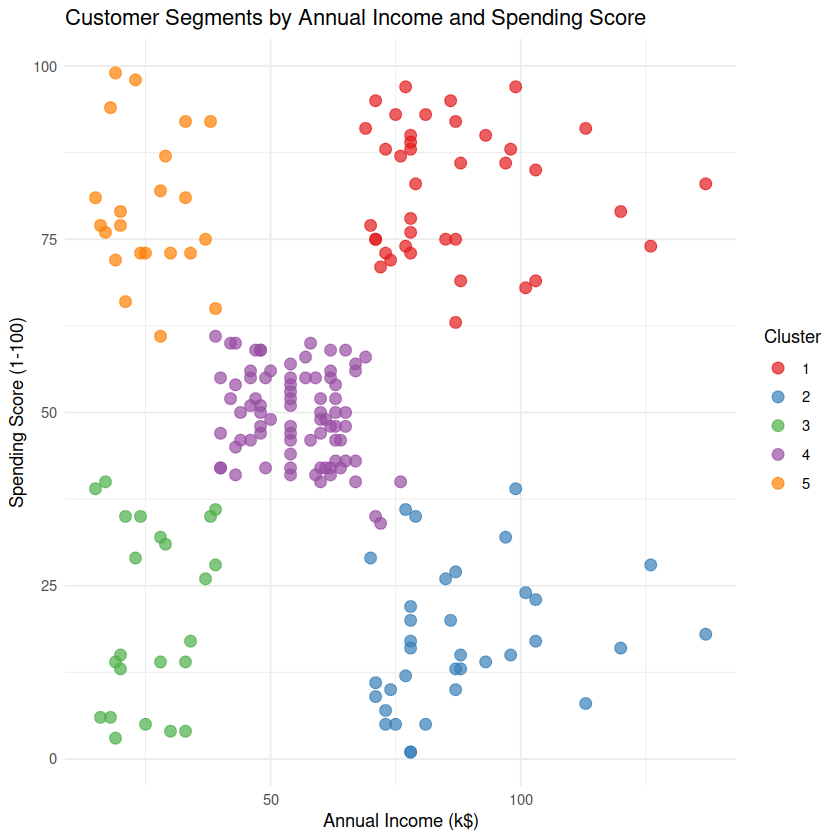

In [18]:
ggplot(mall_data, aes(x = AnnualIncome, y = SpendingScore, color = Cluster)) +
  geom_point(size = 3, alpha = 0.7) +
  scale_color_brewer(palette = "Set1") +
  labs(title = "Customer Segments by Annual Income and Spending Score",
       x = "Annual Income (k$)",
       y = "Spending Score (1-100)") +
  theme_minimal()



In [19]:
cluster_stats <- mall_data %>%
  group_by(Cluster) %>%
  summarise(
    Count = n(),
    Avg_Age = mean(Age),
    Avg_Income = mean(AnnualIncome),
    Avg_Spending = mean(SpendingScore),
    Female_Pct = sum(Gender == "Female") / n() * 100
  )


In [20]:
# Printing Stats
print(cluster_stats)



# A tibble: 5 × 6
  Cluster Count Avg_Age Avg_Income Avg_Spending Female_Pct
  <fct>   <int>   <dbl>      <dbl>        <dbl>      <dbl>
1 1          39    32.7       86.5         82.1       53.8
2 2          35    41.1       88.2         17.1       45.7
3 3          23    45.2       26.3         20.9       60.9
4 4          81    42.7       55.3         49.5       59.3
5 5          22    25.3       25.7         79.4       59.1


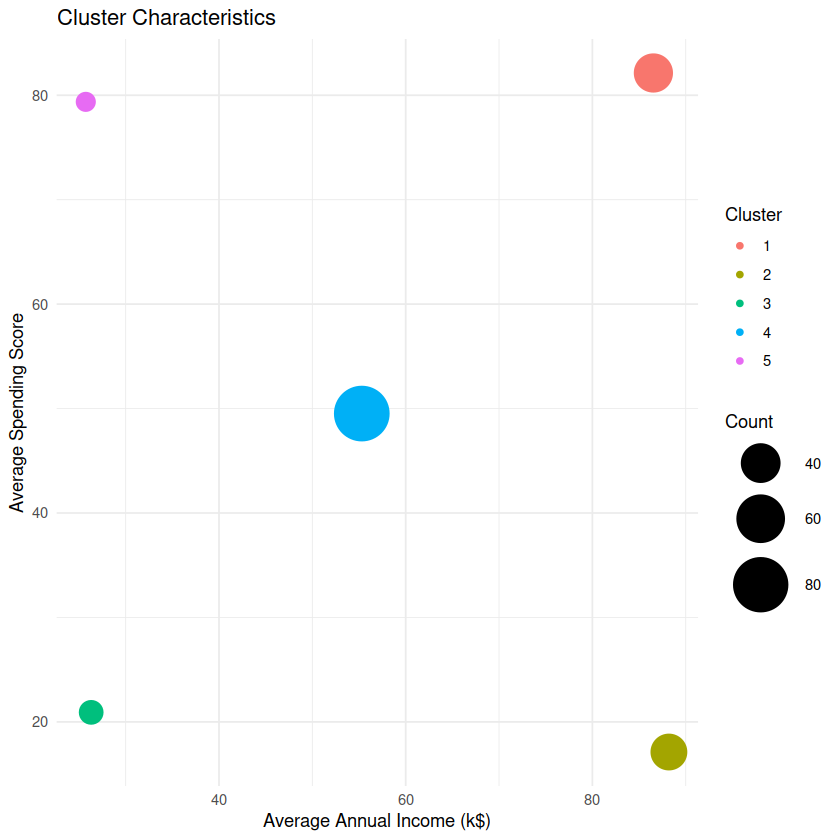

In [21]:
ggplot(cluster_stats, aes(x = Avg_Income, y = Avg_Spending, size = Count, color = Cluster)) +
  geom_point() +
  scale_size(range = c(5, 15)) +
  labs(title = "Cluster Characteristics",
       x = "Average Annual Income (k$)",
       y = "Average Spending Score") +
  theme_minimal()
